# Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_excel("data/lichess_games_summary.xlsx")

In [3]:
df.head(5)

,GameId,Site,Date,UTCDate,UTCTime,White,Black,WhiteElo,BlackElo,Result,...,TimeControl,ECO,Opening,Termination,NumMoves,NumTurns,WhiteCastled,BlackCastled,LastMove,MovesSAN
0,chFMdOke,https://lichess.org/chFMdOke,2024.12.31,2024.12.31,11:15:27,nishiv_chess,seb07,2082.0,1584.0,1-0,...,120+1,C25,Vienna Game: Max Lange Defense,Time forfeit,55,27,True,True,Qxc4,e4 e5 Nc3 Nc6 Bc4 Bc5 d3 Nge7 Nge2 d6 Na4 Bb6 ...
1,uuxb3QTu,https://lichess.org/uuxb3QTu,2024.12.31,2024.12.31,11:01:21,nishiv_chess,Kopstootje,1734.0,1745.0,1-0,...,300+3,B30,Sicilian Defense: Nyezhmetdinov-Rossolimo Attack,Normal,95,47,True,False,R@c6#,e4 c5 Nf3 Nc6 Bb5 Nd4 Nxd4 cxd4 O-O a6 Bc4 e6 ...
2,WXtny7Tt,https://lichess.org/WXtny7Tt,2024.12.31,2024.12.31,10:32:02,Zhigulin,nishiv_chess,1654.0,1647.0,1-0,...,180+3,NaN,NaN,Time forfeit,27,13,False,True,Bf5,Nb3 c6 c3 Ne6 d4 d5 Bd2 f6 e4 Bf7 exd5 cxd5 Ne...
3,pUvUicoD,https://lichess.org/pUvUicoD,2024.12.31,2024.12.31,10:30:08,nishiv_chess,Zhigulin,1634.0,1660.0,1-0,...,180+3,NaN,NaN,Normal,19,9,False,False,Qxc7,Ne3 Nb6 b3 c6 d4 d5 c4 e5 Bc3 e4 a4 Bf4 a5 Nd7...
4,ZY1fLFJO,https://lichess.org/ZY1fLFJO,2024.12.31,2024.12.31,10:24:54,nishiv_chess,Paradygma,1617.0,1694.0,1-0,...,240+3,NaN,NaN,Normal,51,25,False,True,Nb3,g3 d5 d4 Nb6 Bf4 Bf5 Bxc7 Rc8 Bxb6 axb6 c3 Nc6...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GameId        3678 non-null   object 
 1   Site          3678 non-null   object 
 2   Date          3678 non-null   object 
 3   UTCDate       3678 non-null   object 
 4   UTCTime       3678 non-null   object 
 5   White         3678 non-null   object 
 6   Black         3678 non-null   object 
 7   WhiteElo      3673 non-null   float64
 8   BlackElo      3671 non-null   float64
 9   Result        3678 non-null   object 
 10  Variant       3678 non-null   object 
 11  TimeControl   3678 non-null   object 
 12  ECO           3610 non-null   object 
 13  Opening       3610 non-null   object 
 14  Termination   3678 non-null   object 
 15  NumMoves      3678 non-null   int64  
 16  NumTurns      3678 non-null   int64  
 17  WhiteCastled  3678 non-null   bool   
 18  BlackCastled  3678 non-null 

In [5]:
df.describe()

,WhiteElo,BlackElo,NumMoves,NumTurns
count,3673.000000,3671.000000,3678.000000,3678.000000
mean,1859.340866,1871.118769,64.268624,31.889886
std,160.136153,152.002169,30.685029,15.349916
min,690.000000,666.000000,2.000000,1.000000
25%,1811.000000,1848.000000,42.000000,21.000000
50%,1898.000000,1903.000000,59.000000,29.000000
75%,1949.000000,1949.000000,81.000000,40.000000
max,2235.000000,2257.000000,221.000000,110.000000


In [6]:
df.isnull().sum()

GameId           0
Site             0
Date             0
UTCDate          0
UTCTime          0
White            0
Black            0
WhiteElo         5
BlackElo         7
Result           0
Variant          0
TimeControl      0
ECO             68
Opening         68
Termination      0
NumMoves         0
NumTurns         0
WhiteCastled     0
BlackCastled     0
LastMove         0
MovesSAN         0
dtype: int64

In [7]:
df.nunique()

GameId          3678
Site            3678
Date             276
UTCDate          276
UTCTime         3552
White           1632
Black           1524
WhiteElo         651
BlackElo         623
Result             3
Variant            8
TimeControl       86
ECO              123
Opening          322
Termination        2
NumMoves         170
NumTurns          92
WhiteCastled       2
BlackCastled       2
LastMove        1295
MovesSAN        3677
dtype: int64

In [8]:
df['Variant'].value_counts()

Variant
Standard            3475
Crazyhouse           129
Chess960              39
Atomic                22
Racing Kings           5
King of the Hill       4
Horde                  2
Three-check            2
Name: count, dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['UTCDateTime'] = pd.to_datetime(df['UTCDate'] + ' ' + df['UTCTime'])

In [10]:
df = df.drop(columns=['UTCDate','UTCTime'],axis=1)

<Axes: >

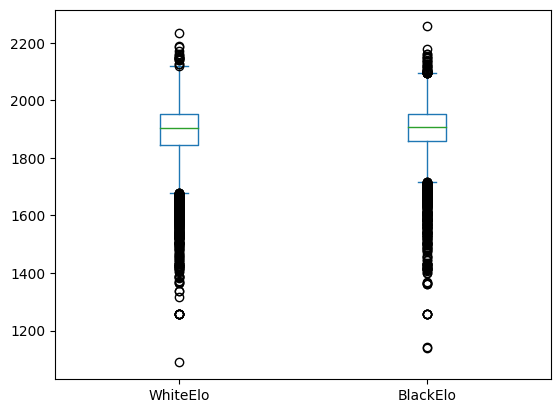

In [16]:
df[df['Variant'] == 'Standard'][['WhiteElo','BlackElo']].plot.box()

# Feature Engineering